# Übung Symbolisches Rechnen

## Tafelübung

Newton-Verfahren mit Sympy

In [1]:
import sympy as sp  # alias-import
sp.init_printing(use_unicode=True)

Gleichung $f(x)$ definieren

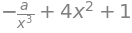

In [14]:
a, x = sp.symbols('a, x', real=True)
fx = 1-a/x**3 + 4*x**2
fx

Ableitung $f'(x)$ berechnen

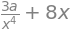

In [15]:
fx1 = sp.diff(fx, x)
fx1

Wert für $a = 3$ substitieren

In [16]:
a_val = 3.0

# schlüssel-wert-paar als ersetzungs-'liste'
params_dict = {a: a_val} # dict key: value
# zugriff auf value über key und nicht wie bei liste über index
fx_a = fx.subs(params_dict)
fx1_a = fx1.subs(params_dict)

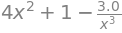

In [17]:
fx_a

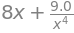

In [18]:
fx1_a

Lambdify um aus Symbolfunktionen, aufrufbare Python-Funktionen zu machen

In [19]:
fxfnc = sp.lambdify(x, fx_a, modules='numpy')
fx1fnc = sp.lambdify(x, fx1_a, modules='numpy')

In [20]:
def calcnewton(fx, fx1, x0, fehler=1e-6):
    # hier: fx, fx1 lokale variablen der funktion calcnewton
    # nicht die selben wie oben!
    x1 = x0
    x2 = x1 - fx(x1)/fx1(x1) # erste iteration
    it = 1

    while (abs(x2-x1)>=fehler):
        x1 = x2
        x2 = x1 - fx(x1)/fx1(x1) 
        it += 1
    return (x2, it, abs(x2-x1))  # tupel

In [21]:
x, it, err = calcnewton(fxfnc, fx1fnc, a_val/2, 1e-8)
print(x, it, err)

0.8940798793848858 5 7.632842136118256e-10


In [22]:
x, it, err = calcnewton(fxfnc, fx1fnc, a_val, 1e-8)
print(x, it, err)

0.8940798793848858 6 1.4160888017755724e-09


Vergleich mit sympy.solve

In [23]:
from sympy.solvers import solve
print(solve(fx_a))

[0.894079879384886]
